In [38]:
import kagglehub
# Download latest version
path = kagglehub.dataset_download("suchintikasarkar/sentiment-analysis-for-mental-health")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/suchintikasarkar/sentiment-analysis-for-mental-health/versions/1


In [39]:
import os

data_directory = "/root/.cache/kagglehub/datasets/suchintikasarkar/sentiment-analysis-for-mental-health/versions/1"
files = os.listdir(data_directory)
print(files)

['Combined Data.csv']


In [40]:
import pandas as pd

# Path to the dataset file
data_path = "/root/.cache/kagglehub/datasets/suchintikasarkar/sentiment-analysis-for-mental-health/versions/1/Combined Data.csv"

# Load the dataset
df = pd.read_csv(data_path)

# Display the first few rows
print(df.head())


   Unnamed: 0                                          statement   status
0           0                                         oh my gosh  Anxiety
1           1  trouble sleeping, confused mind, restless hear...  Anxiety
2           2  All wrong, back off dear, forward doubt. Stay ...  Anxiety
3           3  I've shifted my focus to something else but I'...  Anxiety
4           4  I'm restless and restless, it's been a month n...  Anxiety


In [41]:
#Specify column names
print(df.columns)
#Drop ID column, since it's superflous
# Drop a column (e.g., 'column_name') and create a new DataFrame without that column
df_new = df.drop('Unnamed: 0', axis=1)


Index(['Unnamed: 0', 'statement', 'status'], dtype='object')


In [42]:
#Sanity check
print(df_new.head())

                                           statement   status
0                                         oh my gosh  Anxiety
1  trouble sleeping, confused mind, restless hear...  Anxiety
2  All wrong, back off dear, forward doubt. Stay ...  Anxiety
3  I've shifted my focus to something else but I'...  Anxiety
4  I'm restless and restless, it's been a month n...  Anxiety


In [43]:
# Calculate frequency of each label in the 'label' column
label_counts = df_new['status'].value_counts()
print(label_counts)

status
Normal                  16351
Depression              15404
Suicidal                10653
Anxiety                  3888
Bipolar                  2877
Stress                   2669
Personality disorder     1201
Name: count, dtype: int64


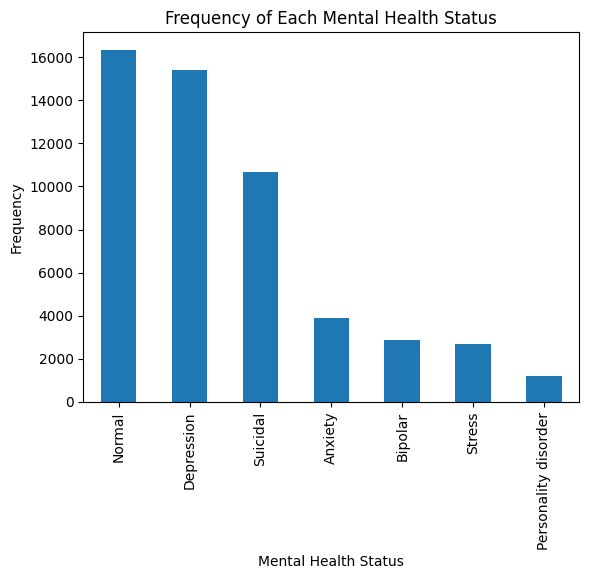

In [44]:
import matplotlib.pyplot as plt

df['status'].value_counts().plot(kind='bar')
plt.xlabel('Mental Health Status')
plt.ylabel('Frequency')
plt.title('Frequency of Each Mental Health Status')
plt.show()

A note that we are dealing with imbalanced data!

In [45]:
#Clean data, making sure not to remove emoticons
#This includes converting to lower case, removing certain punctuation and numbers, and removing stop words (words that don't contain
#meaningful information)

import nltk
nltk.download('stopwords')

import re
import string
from nltk.corpus import stopwords

# Set of English stop words
stop_words = set(stopwords.words('english'))

# Define a set of common emoticons to preserve, removing word boundaries
emoticons = [
    r':\)', r':-\)',    # Happy face
    r':\(', r':-\(',    # Sad face
    r':D', r':-D',      # Big smile
    r';\)', r';-\)',    # Wink
    r':P', r':-P',      # Tongue out
    r':O', r':-O',      # Surprised
    r'XD',              # Laughing face (no nose variation)
    r":'\)", r":-'\)",  # Crying face
]

def clean_text_preserve_emoticons(text):
    if isinstance(text, str):
        # Convert to lowercase
        text = text.lower()

        # Preserve emoticons
        preserved_emoticons = []
        for emoticon in emoticons:
            matches = re.findall(emoticon, text)
            preserved_emoticons.extend(matches)

        # Remove punctuation and numbers, except for emoticons, colons, and semicolons
        text = re.sub(r"[^\w\s:;)(dpoo]", '', text)  # Remove apostrophes, keep emoticons and colons/semicolons
        text = re.sub(r'\d+', '', text)  # Remove numbers

        # Remove stop words
        words = text.split()
        words = [word for word in words if word not in stop_words]

        # Join the cleaned words back into a string and add back the preserved emoticons
        text = ' '.join(words + preserved_emoticons)
        return text
    return ""

# Apply this to your DataFrame column
df_new['cleaned_statement'] = df_new['statement'].apply(clean_text_preserve_emoticons)

# Display the cleaned text
print(df_new[['cleaned_statement']].head())






[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                   cleaned_statement
0                                            oh gosh
1  trouble sleeping confused mind restless heart ...
2  wrong back dear forward doubt stay restless re...
3  ive shifted focus something else im still worried
4                im restless restless month boy mean


In [46]:
#Sanity checks
# 1. View original and cleaned text side-by-side
print(df_new[['statement', 'cleaned_statement']].head(10))




                                           statement  \
0                                         oh my gosh   
1  trouble sleeping, confused mind, restless hear...   
2  All wrong, back off dear, forward doubt. Stay ...   
3  I've shifted my focus to something else but I'...   
4  I'm restless and restless, it's been a month n...   
5  every break, you must be nervous, like somethi...   
6  I feel scared, anxious, what can I do? And may...   
7    Have you ever felt nervous but didn't know why?   
8  I haven't slept well for 2 days, it's like I'm...   
9                 I'm really worried, I want to cry.   

                                   cleaned_statement  
0                                            oh gosh  
1  trouble sleeping confused mind restless heart ...  
2  wrong back dear forward doubt stay restless re...  
3  ive shifted focus something else im still worried  
4                im restless restless month boy mean  
5  every break must nervous like something wrong ... 

In [47]:
#Check for null values

empty_entries = df_new[df_new['cleaned_statement'] == ""]
print("Number of empty entries:", len(empty_entries))
print(empty_entries[['statement', 'cleaned_statement']])


Number of empty entries: 492
           statement cleaned_statement
293              NaN                  
572              NaN                  
595              NaN                  
1224   Just on again                  
1539             NaN                  
...              ...               ...
52838            NaN                  
52870            NaN                  
52936            NaN                  
53010            NaN                  
53031            NaN                  

[492 rows x 2 columns]


In [48]:
# Remove rows where 'cleaned_statement' is either NaN or an empty string
df_new = df_new[df_new['cleaned_statement'].notna() & (df_new['cleaned_statement'] != "")]


In [49]:
#Sanity check--make sure NaN and empty values are removed

print("Any NaN values:", df_new['cleaned_statement'].isna().any())
print("Any empty strings:", (df_new['cleaned_statement'] == "").any())


Any NaN values: False
Any empty strings: False


Label Distribution After Cleaning:
status
Normal                  16217
Depression              15403
Suicidal                10649
Anxiety                  3841
Bipolar                  2777
Stress                   2587
Personality disorder     1077
Name: count, dtype: int64


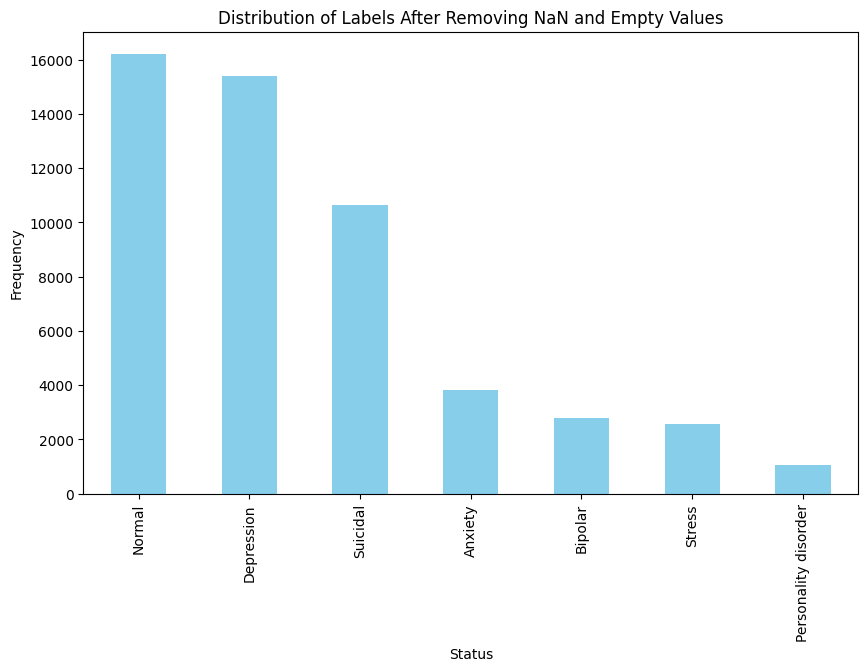

In [50]:
#Check distribution of data after NaNs and empty values removed

label_distribution = df_new['status'].value_counts()
print("Label Distribution After Cleaning:")
print(label_distribution)


# Plot label distribution
plt.figure(figsize=(10, 6))
label_distribution.plot(kind='bar', color='skyblue')
plt.xlabel('Status')
plt.ylabel('Frequency')
plt.title('Distribution of Labels After Removing NaN and Empty Values')
plt.show()


Distribution looks relatively similar to original distribution after removing NaNs and empty values. This alleviates the concern that one column had a disproportionately high number of missing values.

In [51]:
#Check to make sure emoticons weren't removed

import re

# Define a list of common emoticons without word boundaries
emoticons = [
    r':\)', r':-\)',    # Happy face
    r':\(', r':-\(',    # Sad face
    r':D', r':-D',      # Big smile
    r';\)', r';-\)',    # Wink
    r':P', r':-P',      # Tongue out
    r':O', r':-O',      # Surprised
    r'XD',              # Laughing face (no nose variation)
    r":'\)", r":-'\)",  # Crying face
]

# Combine emoticons into a single regex pattern
emoticon_pattern = '|'.join(emoticons)

# Create a Boolean column in the original DataFrame that indicates the presence of emoticons
df['contains_emoticons_original'] = df['statement'].fillna('').str.contains(emoticon_pattern, regex=True)

# Create a Boolean column in the cleaned DataFrame that indicates the presence of emoticons
df_new['contains_emoticons_cleaned'] = df_new['cleaned_statement'].fillna('').str.contains(emoticon_pattern, regex=True)

# Filter rows with emoticons in both datasets
emoticon_rows_original = df[df['contains_emoticons_original']]
emoticon_rows_cleaned = df_new[df_new['contains_emoticons_cleaned']]

# Display rows with emoticons in the original dataset
print("Rows with emoticons in the original dataset:")
print(emoticon_rows_original[['statement', 'contains_emoticons_original']])

# Display rows with emoticons in the cleaned dataset
print("\nRows with emoticons in the cleaned dataset:")
print(emoticon_rows_cleaned[['cleaned_statement', 'contains_emoticons_cleaned']])


#A minimal number of characters classified as emoticons in the original dataset were removed--I'm ok with this



Rows with emoticons in the original dataset:
                                               statement  \
6      I feel scared, anxious, what can I do? And may...   
8      I haven't slept well for 2 days, it's like I'm...   
19     If the guy is sick, the girl actually feels si...   
49     I don't know if my mind breaks down, but I don...   
116    And again suddenly feeling nervous and anxious...   
...                                                  ...   
52983  I can’t even vent to my friends and family any...   
52985  Feeling so overwhelmed. can’t cope. Work is ca...   
52998  Going to the cinema This is probably a very pa...   
53012  Does anyone feel anxiety because of some peopl...   
53030  A heart attack would be very obvious right? He...   

       contains_emoticons_original  
6                             True  
8                             True  
19                            True  
49                            True  
116                           True  
...         

In [52]:
#Just curious: Why are there fewer emoticons in the cleaned dataset?

import re
import pandas as pd

# Define a list of common emoticons without word boundaries
emoticons = [
    r':\)', r':-\)',    # Happy face
    r':\(', r':-\(',    # Sad face
    r':D', r':-D',      # Big smile
    r';\)', r';-\)',    # Wink
    r':P', r':-P',      # Tongue out
    r':O', r':-O',      # Surprised
    r'XD',              # Laughing face (no nose variation)
    r":'\)", r":-'\)",  # Crying face
]

# Combine emoticons into a single regex pattern
emoticon_pattern = '|'.join(emoticons)

# Create a Boolean column in the original DataFrame indicating the presence of emoticons
df['contains_emoticons_original'] = df['statement'].fillna('').str.contains(emoticon_pattern, regex=True)

# Create a Boolean column in the cleaned DataFrame indicating the presence of emoticons
df_new['contains_emoticons_cleaned'] = df_new['cleaned_statement'].fillna('').str.contains(emoticon_pattern, regex=True)

# Identify rows where emoticons are present in the original dataset but not in the cleaned dataset
emoticon_discrepancy_rows = df[(df['contains_emoticons_original']) & (~df_new['contains_emoticons_cleaned'])]

# Set max column width to None to display the full content of each cell
pd.set_option('display.max_colwidth', None)

# Display the rows with discrepancies, showing the full content
print("Rows with emoticons in the original dataset but not in the cleaned dataset:")
print(emoticon_discrepancy_rows[['statement']])

# Reset display option to default after printing
pd.reset_option('display.max_colwidth')




Rows with emoticons in the original dataset but not in the cleaned dataset:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [53]:
#Sanity check to make sure capital letters were removed

contains_capital_letters = df_new['cleaned_statement'].str.contains(r"[A-Z]").any()
print("Contains capital letters:", contains_capital_letters)


Contains capital letters: False


In [54]:
#Remove contractions
!pip install contractions

from contractions import fix

df_new['cleaned_statement'] = df_new['cleaned_statement'].apply(fix)


In [56]:
#Sanity check: check if common contractions separated into two words

# Define common contractions and their expanded forms
contractions_expansions = {
    "don't": "do not",
    "can't": "cannot",
    "I'm": "I am",
    "you're": "you are",
    "they've": "they have",
    "it's": "it is",
    "isn't": "is not",
    "won't": "will not",
    "didn't": "did not",
    "couldn't": "could not"
}

# Check if any contractions remain and if expanded versions exist
for contraction, expanded in contractions_expansions.items():
    # Check if any remaining contractions are present
    has_contraction = df_new['cleaned_statement'].str.contains(contraction, case=False).any()

    # Check if expanded form is present
    has_expansion = df_new['cleaned_statement'].str.contains(expanded, case=False).any()

    # Print results for each contraction
    print(f"Contraction '{contraction}':")
    print(f"  Exists in cleaned text? {has_contraction}")
    print(f"  Expanded form '{expanded}' found? {has_expansion}")
    print()



Contraction 'don't':
  Exists in cleaned text? False
  Expanded form 'do not' found? True

Contraction 'can't':
  Exists in cleaned text? False
  Expanded form 'cannot' found? True

Contraction 'I'm':
  Exists in cleaned text? False
  Expanded form 'I am' found? True

Contraction 'you're':
  Exists in cleaned text? False
  Expanded form 'you are' found? True

Contraction 'they've':
  Exists in cleaned text? False
  Expanded form 'they have' found? True

Contraction 'it's':
  Exists in cleaned text? False
  Expanded form 'it is' found? True

Contraction 'isn't':
  Exists in cleaned text? False
  Expanded form 'is not' found? True

Contraction 'won't':
  Exists in cleaned text? False
  Expanded form 'will not' found? True

Contraction 'didn't':
  Exists in cleaned text? False
  Expanded form 'did not' found? True

Contraction 'couldn't':
  Exists in cleaned text? False
  Expanded form 'could not' found? True



In [57]:
#Remove words containing non-ASCII and other odd characters but preserving emoticons

import re

# Define a list of common emoticons to preserve
emoticons = [
    r':\)', r':-\)',    # Happy face
    r':\(', r':-\(',    # Sad face
    r':D', r':-D',      # Big smile
    r';\)', r';-\)',    # Wink
    r':P', r':-P',      # Tongue out
    r':O', r':-O',      # Surprised
    r'XD',              # Laughing face (no nose variation)
    r":'\)", r":-'\)",  # Crying face
]

def remove_odd_words_preserve_emoticons(text):
    # Split the text into words
    words = text.split()

    # Filter words: keep ASCII-only words, emoticons, or words containing allowed special characters
    filtered_words = []
    for word in words:
        # Keep the word if it matches emoticon pattern
        if any(re.match(emoticon, word) for emoticon in emoticons):
            filtered_words.append(word)
        # Keep ASCII-only words with allowed characters (apostrophe, semicolon, slash, dash)
        elif re.match(r"^[a-zA-Z';/\-]+$", word):
            filtered_words.append(word)

    # Join the filtered words back into a string
    return ' '.join(filtered_words)

# Apply to DataFrame column
df_new['cleaned_statement'] = df_new['cleaned_statement'].apply(remove_odd_words_preserve_emoticons)

# Display the cleaned text
print(df_new[['cleaned_statement']].head())





                                   cleaned_statement
0                                            oh gosh
1  trouble sleeping confused mind restless heart ...
2  wrong back dear forward doubt stay restless re...
3  i have shifted focus something else i am still...
4              i am restless restless month boy mean


In [58]:
#Check to make sure emoticons weren't removed

import re

# Define a list of common emoticons
emoticons = [
    r':\)', r':-\)',    # Happy face
    r':\(', r':-\(',    # Sad face
    r':D', r':-D',      # Big smile
    r';\)', r';-\)',    # Wink
    r':P', r':-P',      # Tongue out
    r':O', r':-O',      # Surprised
    r'XD',              # Laughing face (no nose variation)
    r":'\)", r":-'\)",  # Crying face
]

# Combine emoticons into a single regex pattern
emoticon_pattern = '|'.join(emoticons)

# Check if any cleaned statements contain emoticons
contains_emoticons = df_new['cleaned_statement'].str.contains(emoticon_pattern, regex=True)

# Display rows that still contain emoticons
emoticon_rows = df_new[contains_emoticons]

print("Rows in cleaned dataset with emoticons:")
print(emoticon_rows[['cleaned_statement']])

#This code kept most emoticons, although it did delete some.

Rows in cleaned dataset with emoticons:
                                       cleaned_statement
6      feel scared anxious may family us protected :) :)
8      have not slept well days like i am restless hu...
19     guy sick girl actually feels sick indirectly m...
49     do not know mind breaks do not want think :( f...
116    suddenly feeling nervous anxious without knowi...
...                                                  ...
52983  cannot even vent friends family anymore they w...
52985  feeling overwhelmed cannot cope work causing m...
52998  going cinema probably particular issue i have ...
53012  anyone feel anxiety people bad english grammar...
53030  heart attack would obvious right hey guys pain...

[947 rows x 1 columns]


In [59]:
#Convert words into their base form
import nltk
nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
df_new['cleaned_statement'] = df_new['cleaned_statement'].apply(lambda x: " ".join([lemmatizer.lemmatize(word) for word in x.split()]))


[nltk_data] Downloading package wordnet to /root/nltk_data...


In [60]:
#Sanity check lemmatization

# Create a new DataFrame with the original and cleaned text columns
combined_df = pd.DataFrame({
    'statement': df['statement'],
    'cleaned_statement': df_new['cleaned_statement']
})

# Display the first few rows
print(combined_df.head(10))



                                           statement  \
0                                         oh my gosh   
1  trouble sleeping, confused mind, restless hear...   
2  All wrong, back off dear, forward doubt. Stay ...   
3  I've shifted my focus to something else but I'...   
4  I'm restless and restless, it's been a month n...   
5  every break, you must be nervous, like somethi...   
6  I feel scared, anxious, what can I do? And may...   
7    Have you ever felt nervous but didn't know why?   
8  I haven't slept well for 2 days, it's like I'm...   
9                 I'm really worried, I want to cry.   

                                   cleaned_statement  
0                                            oh gosh  
1  trouble sleeping confused mind restless heart ...  
2  wrong back dear forward doubt stay restless re...  
3  i have shifted focus something else i am still...  
4              i am restless restless month boy mean  
5  every break must nervous like something wrong ... 

In [64]:
#Trying the Porter stemmer

from nltk.stem import PorterStemmer
import re

# Initialize the Porter Stemmer
porter = PorterStemmer()

def simple_tokenizer(text):
    # Use regex to split words
    return re.findall(r'\b\w+\b', text)

def stem_text(text):
    words = simple_tokenizer(text)  # Tokenize with custom tokenizer
    # Stem each word and join them back into a single string
    stemmed_text = ' '.join(porter.stem(word) for word in words)
    return stemmed_text

# Apply stemming to a DataFrame column
df_new['stemmed_statement'] = df_new['cleaned_statement'].apply(stem_text)

# Display the stemmed text
print(df_new[['cleaned_statement', 'stemmed_statement']].head())




                                   cleaned_statement  \
0                                            oh gosh   
1  trouble sleeping confused mind restless heart ...   
2  wrong back dear forward doubt stay restless re...   
3  i have shifted focus something else i am still...   
4              i am restless restless month boy mean   

                                   stemmed_statement  
0                                            oh gosh  
1       troubl sleep confus mind restless heart tune  
2  wrong back dear forward doubt stay restless re...  
3      i have shift focu someth els i am still worri  
4              i am restless restless month boy mean  


In [65]:
#Experiment with tf-idf transformation after making a copy of the dataset

from sklearn.feature_extraction.text import TfidfVectorizer


# Make a copy of the dataset to avoid modifying the original
df_tfidf = df_new.copy()

# Initialize TfidfVectorizer with smooth_idf=True
tfidf_vectorizer = TfidfVectorizer(max_features=10000, smooth_idf=True)

# Fit and transform the 'cleaned_statement' column in the copied dataset
tfidf_matrix = tfidf_vectorizer.fit_transform(df_tfidf['stemmed_statement'])

# Convert the TF-IDF matrix to a DataFrame for better readability
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display the first few rows of the TF-IDF DataFrame
print(tfidf_df.head())



    aa  aaa  aamp  aand   ab  aback  abandon  abd  abdomen  abdomin  ...  \
0  0.0  0.0   0.0   0.0  0.0    0.0      0.0  0.0      0.0      0.0  ...   
1  0.0  0.0   0.0   0.0  0.0    0.0      0.0  0.0      0.0      0.0  ...   
2  0.0  0.0   0.0   0.0  0.0    0.0      0.0  0.0      0.0      0.0  ...   
3  0.0  0.0   0.0   0.0  0.0    0.0      0.0  0.0      0.0      0.0  ...   
4  0.0  0.0   0.0   0.0  0.0    0.0      0.0  0.0      0.0      0.0  ...   

   zombi  zombifi  zonaba  zonauang  zone  zoo  zoom  zopiclon   zu  zyprexa  
0    0.0      0.0     0.0       0.0   0.0  0.0   0.0       0.0  0.0      0.0  
1    0.0      0.0     0.0       0.0   0.0  0.0   0.0       0.0  0.0      0.0  
2    0.0      0.0     0.0       0.0   0.0  0.0   0.0       0.0  0.0      0.0  
3    0.0      0.0     0.0       0.0   0.0  0.0   0.0       0.0  0.0      0.0  
4    0.0      0.0     0.0       0.0   0.0  0.0   0.0       0.0  0.0      0.0  

[5 rows x 10000 columns]


Some questions:
-Should we do out of core learning since we have a relatively large dataset?

-Still don't get why emoticons were removed. Do we have to get to the bottom of it? Does it matter since not many were removed?

-Should we use GridSearch CV to find the best parameters before tokenization? Not sure if it will take too long since we have a large dataset

-Maybe tf-idf with weighting isn't the best approach since we don't necessarily want to downplay words that commonly appear?

-From Chollet: It turns out that when approaching a new text-classification task, you should pay close attention to the ratio between the number of samples in your training data and the mean number of words per sample (see figure 11.11). If that ratio is small—less than 1,500—then the bag-of-bigrams model will perform better (and as a bonus, it will be much faster to train and to iterate on too). If that ratio is higher than 1,500, then you should go with a sequence model. In other words, sequence models work best when lots of training data is available and when each sample is relatively short.
